In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

from astropy.cosmology import FlatLambdaCDM, WMAP9, z_at_value
from astropy import units as u

from IPython.display import clear_output    # To clear cell output

from scipy.interpolate import interp1d      # For spline interpolation
from scipy.integrate import quad
from scipy.integrate import dblquad         # For vector integration
from scipy.fft import fft2

In [2]:
choice = 2

global c, PI, h, h_cross, G, AU, pc, Gpc

if choice == 1:
    c = 2.998 * 1e8          # in m/s
    PI = np.pi
    h = 4.136 * 1e-15        # in eV.s
    h_cross = h / (2*PI)     # in eV.s
    G = 6.674 * 1e-11        # in N.m^2/kg^2
    AU = 1.495e+11           # astronomical unit = 149.6 million km
    pc = 3.085e+16           # parsec = 3.26 light years = 206,000 AU = 30.9 trillion km
    Gpc = 1e9*pc
    M_sun = 1.9891e+30       # in kg
    mas = 4.8481*1e-9        # 1 mas in radians
    eV = 1.60218e-19         # 1 eV in Joules
    
elif choice == 2:
    c = 3 * 1e8              # in m/s
    PI = 3.1416
    h = 4.136 * 1e-15        # in eV.s
    h_cross = h / (2*PI)     # in eV.s
    G = 6.67 * 1e-11         # in N.m^2/kg^2
    AU = 1.5e+11             # astronomical unit = 149.6 million km
    pc = 3e+16               # parsec = 3.26 light years = 206,000 AU = 30.9 trillion km
    Gpc = 1e9*pc
    M_sun = 2e30             # in kg
    mas = 5*1e-9             # 1 mas in radians
    eV = 1.6e-19             # 1 eV in Joules

In [3]:
class light:
    def __init__(self, quantity, choice = 'nu'):
        if (choice == 'lambda'):
            self.lmbda = quantity
            self.omega = 2*PI*c/self.lmbda
            self.E = h_cross * self.omega
            self.nu = self.omega / (2*PI)
        elif (choice == 'E'):
            self.E = quantity
            self.omega = self.E/h_cross
            self.lmbda = 2*PI*c/self.omega
            self.nu = self.omega / (2*PI)
        elif (choice == 'omega'):
            self.omega = quantity
            self.E = h_cross * self.omega
            self.lmbda = 2*PI*c/self.omega
            self.nu = self.omega / (2*PI)
        else:
            self.omega = 2*PI*quantity
            self.E = h_cross * self.omega
            self.lmbda = 2*PI*c/self.omega
            self.nu = quantity

In [4]:
def Einstein_angle(M, D):
    return np.sqrt(4*G*(M*M_sun)/c**2 * 1/(D*Gpc))

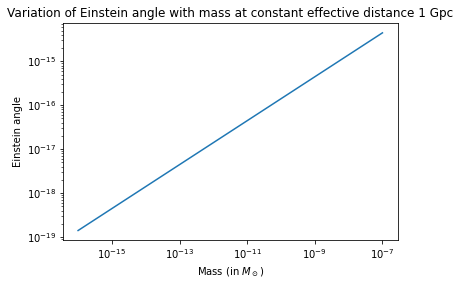

In [5]:
tmp_M = np.logspace(-16, -7, 10)
tmp_theta_E = Einstein_angle(tmp_M, 1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mass (in $M_\odot$)')
plt.ylabel('Einstein angle')
plt.title('Variation of Einstein angle with mass at constant effective distance 1 Gpc')
plt.plot(tmp_M, tmp_theta_E)

In [6]:
def Lensing_potential(theta, theta_E):
    return (theta_E**2 * np.log(theta))

In [7]:
def theta_plus(beta, theta_E):
    return (1/2*(beta + np.sqrt(beta**2 + theta_E**2)))

def theta_minus(beta, theta_E):
    return (1/2*(beta - np.sqrt(beta**2 + theta_E**2)))

def time_delay(u, theta_E, D, z_L):
    beta = u*theta_E
    return np.abs((1/c * (D*Gpc)) * (1 + z_L) * ((theta_plus(beta, theta_E) - beta)**2/2 - (theta_minus(beta, theta_E) - beta)**2/2 - 
                                     theta_E**2 * np.log(np.abs(theta_plus(beta, theta_E)/theta_minus(beta, theta_E)))))

**Question**

Lensing potential expression for point lens?

In [8]:
def phase_shift(omega, Delta_td):
    return (omega*Delta_td)

In [9]:
def typical_time(u, theta_E, D, z_L):
    return (D/c * theta_E**2 * (1 + z_L))

def Time_Delay_2(u, theta_E, D, z_L):
    return (typical_time(u, theta_E, D, z_L) * (u*np.sqrt(u**2+4)/2 + np.log((u+np.sqrt(u**2+4)/(u-np.sqrt(u**2-4))))))

In [10]:
def mu_plus(u):
    return np.abs(1/2 + (u**2 + 2)/(2*u*np.sqrt(u**2 + 4)))

def mu_minus(u):
    return np.abs(1/2 - (u**2 + 2)/(2*u*np.sqrt(u**2 + 4)))

def point_source_mag(u, Delta_phi):
    tmp_mu_plus = mu_plus(u)
    tmp_mu_minus = mu_minus(u)
    return (tmp_mu_plus + tmp_mu_minus + 2 * np.sqrt(tmp_mu_plus * tmp_mu_minus) * np.sin(Delta_phi))

$$u = \frac{\beta}{\theta_E} \ \ \ \  x = \frac{\theta}{\theta_E}$$

In [11]:
tmp_light = light(1e15)
print(tmp_light.lmbda)
DS = 0.5
x_lens = 0.5
DL = DS*x_lens
D = DS*DL/(DS - DL)
M = 1e-10
theta_E = Einstein_angle(M,D)
print(D*theta_E*Gpc)

3e-07
2982169232.8460054


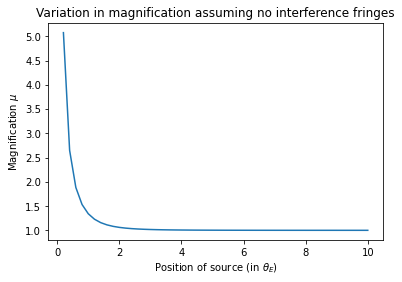

In [12]:
tmp_u = np.arange(1,51)/5
tmp_mu = point_source_mag(tmp_u, 0)
plt.title('Variation in magnification assuming no interference fringes')
plt.xlabel('Position of source (in $\\theta_E$)')
plt.ylabel('Magnification $\mu$')
plt.plot(tmp_u, tmp_mu)

- Light frequency
- Distances
- Mass of lens
- Einstein Angle
- Lensing Potential

In [13]:
# Example declaration for class light
l1 = light(10**20)

In [14]:
DS = 1
x_lens = 0.5
D = DS*(x_lens/(1-x_lens))

In [15]:
M = 1e-10
theta_E = Einstein_angle(M, D)

In [16]:
WMAP9.comoving_distance(0.12).value/1e3

0.5052514630129196

In [17]:
z_L = 0.12    # (Approx) for lens at 0.5 Gpc

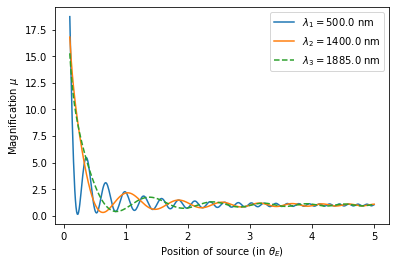

In [18]:
tmp_u = np.arange(10, 501)/100
tmp_Delta_td = time_delay(tmp_u, theta_E, D, z_L)

tmp_l1 = light(500 * 1e-9, 'lambda')    # 500 nm light
tmp_phi1 = phase_shift(tmp_l1.omega, tmp_Delta_td)
tmp_mag1 = point_source_mag(tmp_u, tmp_phi1)

tmp_l2 = light(1400 * 1e-9, 'lambda')   # 1400 nm light
tmp_phi2 = phase_shift(tmp_l2.omega, tmp_Delta_td)
tmp_mag2 = point_source_mag(tmp_u, tmp_phi2)

tmp_l3 = light(1e+15, 'omega')   # 1900 nm light
tmp_phi3 = phase_shift(tmp_l3.omega, tmp_Delta_td)
tmp_mag3 = point_source_mag(tmp_u, tmp_phi3)

plt.plot(tmp_u, tmp_mag1, label = '$\lambda_1 = $'+str(np.round(tmp_l1.lmbda*1e9))+' nm')
plt.plot(tmp_u, tmp_mag2, label = '$\lambda_2 = $'+str(np.round(tmp_l2.lmbda*1e9))+' nm')
plt.plot(tmp_u, tmp_mag3, '--', label = '$\lambda_3 = $'+str(np.round(tmp_l3.lmbda*1e9))+' nm')

plt.xlabel('Position of source (in $\\theta_E$)')
plt.ylabel('Magnification $\mu$')
plt.legend()

In [19]:
tmp_l3.lmbda

1.88496e-06

/tmp/ipykernel_7652/3214954847.py:10: RuntimeWarning: divide by zero encountered in true_divide
  theta_E**2 * np.log(np.abs(theta_plus(beta, theta_E)/theta_minus(beta, theta_E)))))
/tmp/ipykernel_7652/995373215.py:10: RuntimeWarning: invalid value encountered in sin
  return (tmp_mu_plus + tmp_mu_minus + 2 * np.sqrt(tmp_mu_plus * tmp_mu_minus) * np.sin(Delta_phi))


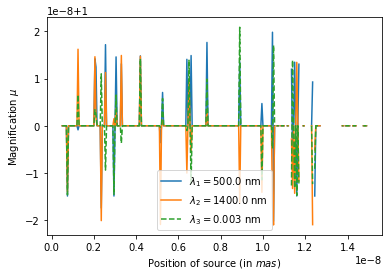

In [20]:
tmp_beta = np.linspace(mas/10, 5*mas, 491)
tmp_u = tmp_beta / theta_E
tmp_Delta_td = time_delay(tmp_u, theta_E, D, z_L)

tmp_l1 = light(500 * 1e-9, 'lambda')    # 500 nm light
tmp_phi1 = phase_shift(tmp_l1.omega, tmp_Delta_td)
tmp_mag1 = point_source_mag(tmp_u, tmp_phi1)

tmp_l2 = light(1400 * 1e-9, 'lambda')   # 1400 nm light
tmp_phi2 = phase_shift(tmp_l2.omega, tmp_Delta_td)
tmp_mag2 = point_source_mag(tmp_u, tmp_phi2)

tmp_l3 = light(1e20, 'nu')   # 1900 nm light
tmp_phi3 = phase_shift(tmp_l3.omega, tmp_Delta_td)
tmp_mag3 = point_source_mag(tmp_u, tmp_phi3)

plt.plot(tmp_beta, tmp_mag1, label = '$\lambda_1 = $'+str(np.round(tmp_l1.lmbda*1e9))+' nm')
plt.plot(tmp_beta, tmp_mag2, label = '$\lambda_2 = $'+str(np.round(tmp_l2.lmbda*1e9))+' nm')
plt.plot(tmp_beta, tmp_mag3, '--', label = '$\lambda_3 = $'+str((tmp_l3.lmbda*1e9))+' nm')

plt.xlabel('Position of source (in $mas$)')
plt.ylabel('Magnification $\mu$')
plt.legend()

In [21]:
WMAP9.comoving_distance(2)

<Quantity 5291.73037438 Mpc>

# Question

How to use https://stackoverflow.com/questions/43610906/very-large-array-handling-with-astropy-and-numpy

In [22]:
def sim_lens_plane(epsilon, M, DS, x_lens, num_sides, omega, excluded_mag):

    DL = x_lens*DS
    DLS = DS - DL
    D = DS*DL/DLS
    
    theta_E = Einstein_angle(M, D)
    
    mu = np.zeros([num_sides,num_sides])
    
    beta = np.zeros([num_sides,num_sides])
    u = np.zeros([num_sides,num_sides])
    
    count = 0
    grid_length = 2*2*theta_E
    #grid_length = 2*mas/1e3    # 1 mas to radians
    pixel_length = grid_length/num_sides

    tmp_x = np.outer(np.ones(num_sides), (np.arange(int(-num_sides/2), int(num_sides/2)) + 0.5)*pixel_length)
    tmp_y = np.outer((np.arange(int(-num_sides/2), int(num_sides/2)) + 0.5)*pixel_length, np.ones(num_sides))

    beta = np.sqrt(tmp_x**2 + tmp_y**2)
    u = beta/theta_E
    
    z_L = 0.12
    Delta_phi = omega*time_delay(u, theta_E, D, z_L)
    mu = point_source_mag(u, Delta_phi)
    if (excluded_mag != -1):
        mu = np.where(mu > excluded_mag, 1, mu)
    count = (mu > (1+epsilon)).sum()
    #print("count =",count, '/', num_sides**2) 
    #print(' ')
    
    app_mag = -2.5 * np.log10(mu)
    
    return mu, app_mag, count, grid_length

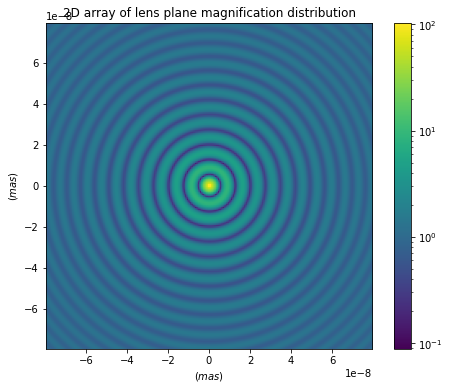

Mass of lens 1e-10
Frequency of light 1.00e+15
Maximum difference in magnification 23.005274592307664
Maximum difference in apparent magnitude 6.043309489292508


In [23]:
l1 = light(10**15)    # Input Frequency in Hertz
epsilon = 0
M = 1e-10
DS = 0.5
x_lens = 0.5
num_sides = 200

[mu, app_mag, count, grid_length] = sim_lens_plane(epsilon, M, DS, x_lens, num_sides, l1.omega, -1)


fig = plt.figure(figsize=(8,6))
#pixel_extent = grid_length/theta_E/2
pixel_extent = grid_length/mas/2
plt.imshow(mu, extent=[-pixel_extent, pixel_extent, -pixel_extent, pixel_extent], norm=colors.LogNorm(vmin=np.min(mu), vmax=np.max(mu)))
plt.title("2D array of lens plane magnification distribution")
plt.xlabel('$(mas)$')
plt.ylabel("$(mas)$")
plt.colorbar()
plt.show()
'''
fig = plt.figure(figsize=(8,6))
plt.imshow(app_mag, extent=[-pixel_extent, pixel_extent, -pixel_extent, pixel_extent])#, norm=colors.LogNorm(vmin=np.min(mu), vmax=np.max(mu)))
plt.title("2D array of lens plane apparent magnitude distribution")
plt.xlabel('$(mas)$')
plt.ylabel("$(mas)$")
plt.colorbar()
plt.show()
'''

print('Mass of lens', M)
print('Frequency of light', '{:.2e}'.format(l1.nu))
print('Maximum difference in magnification', np.max(mu[:int(num_sides/2) - 2, :int(num_sides/2) - 2]) - np.min(mu))
print('Maximum difference in apparent magnitude', np.max(app_mag) - np.min(app_mag[:int(num_sides/2) - 2, :int(num_sides/2) - 2]))

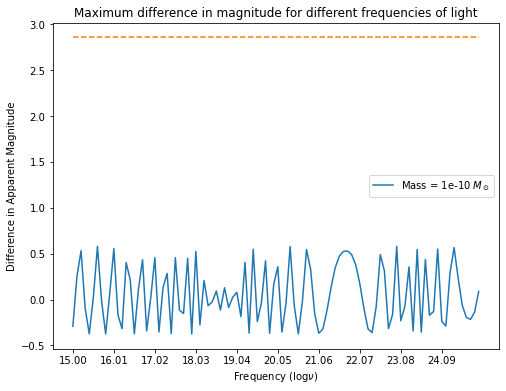

In [24]:
l1 = light(10**20)    # Input Frequency in Hertz
epsilon = 0
M = 1e-9
DS = 0.5
x_lens = 0.1
num_sides = 200
n = 100

fig = plt.figure(figsize = (8,6))
X_ = np.linspace(15,25,n)

count = np.zeros(n)
mag_sep = np.zeros(n)
for j in range(1):
    M = 10**(-10-j)
    for i in range(n):
        [_, app_mag, count[i], _] = sim_lens_plane(epsilon, M, DS, x_lens, num_sides, 2 * PI * 10**(15+(i/n)), -1)
        [_, app_mag_2, _, _] = sim_lens_plane(epsilon, M, DS, x_lens, num_sides, 0, -1)
        #mag_sep[i] = np.max(app_mag) - np.min(app_mag[:int(num_sides/2) - 2, :int(num_sides/2) - 2])
        mag_sep[i] = app_mag[40][40] - app_mag_2[40][40]
    
    #clear_output(wait=True)
    
    #plt.plot(X_, mag_sep, label = 'Mass = ' + str(M) + ' $M_\odot$')
    plt.plot(X_, mag_sep, label = 'Mass = ' + str(M) + ' $M_\odot$')
    plt.plot(X_, np.ones(n)*(np.max(app_mag_2) - np.min(app_mag_2[:int(num_sides/2) - 2, :int(num_sides/2) - 2])), '--')
    
plt.xticks(X_[::int(n/10)])
plt.title('Maximum difference in magnitude for different frequencies of light')
plt.xlabel('Frequency ($\log \\nu$)')
plt.ylabel('Difference in Apparent Magnitude')
#plt.yscale('log')
plt.legend()
plt.show()

No handles with labels found to put in legend.


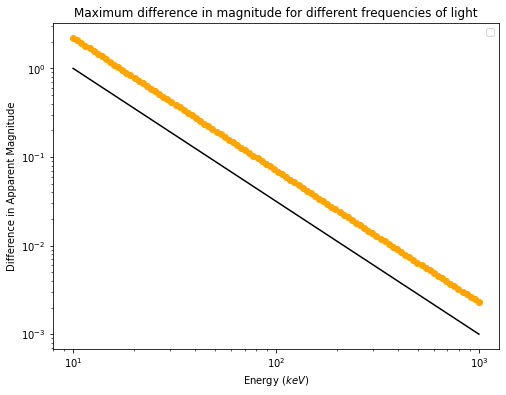

In [25]:
n = 100
E = np.logspace(1, 3, n)
GRB_unlensed = np.logspace(0, -3, n)
M = 1e-15
z_S = 1
z_L = 0.8
u = 0.5
num_sides = 200

DS = WMAP9.comoving_distance(z_S).value/1e3
DL = WMAP9.comoving_distance(z_L).value/1e3
D = DS*DL/(DS - DL)

theta_E = Einstein_angle(M, D)

fig = plt.figure(figsize=(8,6))

for i in range(n):
    [tmp_mu, _, _, tmp_grid_length] = sim_lens_plane(epsilon, M, DS, x_lens, num_sides, E[i]/h_cross, -1)
    plt.scatter(E[i], tmp_mu[100][75] * GRB_unlensed[i], c='orange')

plt.plot(E, GRB_unlensed, c='black')
plt.title('Maximum difference in magnitude for different frequencies of light')
plt.xlabel('Energy ($keV$)')
plt.ylabel('Difference in Apparent Magnitude')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

## Temporal Variations

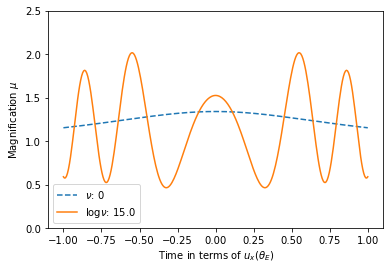

In [26]:
u_0 = 1
terminal_pos = 1
num_intervals = 301

M = 1e-10

DS = 1
x_lens = 0.5
z_L = 0.12
D = DS*(x_lens/(1-x_lens))

theta_E = Einstein_angle(M, D)

tmp_l = np.array([light(10**15), light(10**16), light(10**17), light(10**18), light(10**19), light(10**20)])

tmp_xt = np.linspace(-terminal_pos, terminal_pos, num_intervals)
tmp_y = u_0

tmp_u = np.sqrt(tmp_xt**2 + tmp_y**2)

tmp_mu_without_interference = point_source_mag(tmp_u, 0)
plt.plot(tmp_xt, tmp_mu_without_interference, '--', label = '$\\nu$: '+str(0))
plt.xlabel('Time in terms of $u_x(\\theta_E)$')
plt.ylabel('Magnification $\mu$')
plt.ylim([0, 2.5])
                  
for i in range(1):
    tmp_Delta_phi = tmp_l[i].omega * time_delay(tmp_u, theta_E, D, z_L)
    tmp_mu_with_interference = point_source_mag(tmp_u, tmp_Delta_phi)
    plt.plot(tmp_xt, tmp_mu_with_interference, label = '$\log \\nu$: '+str(np.log10(tmp_l[i].nu)))
    
plt.legend()

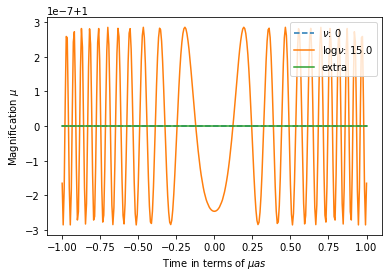

In [27]:
M = 1e-9

DS = 0.5
x_lens = 0.1
z_L = 0.12
D = DS*(x_lens/(1-x_lens))

theta_E = Einstein_angle(M, D)

u_0 = 1*mas/1e3 / theta_E
terminal_pos = 1
num_intervals = 301

tmp_l = np.array([light(10**15), light(10**16), light(10**17), light(10**18), light(10**19), light(10**20)])

tmp_xt = np.linspace(-terminal_pos, terminal_pos, num_intervals)
tmp_y = u_0

tmp_u = np.sqrt(tmp_xt**2 + tmp_y**2)

tmp_mu_without_interference = point_source_mag(tmp_u, 0)
plt.plot(tmp_xt, tmp_mu_without_interference, '--', label = '$\\nu$: '+str(0))
plt.xlabel('Time in terms of $\mu as$')
plt.ylabel('Magnification $\mu$')
#plt.ylim([0, 2.5])
                  
for i in range(1):
    tmp_Delta_phi = tmp_l[i].omega * time_delay(tmp_u, theta_E, D, z_L)
    tmp_mu_with_interference = point_source_mag(tmp_u, tmp_Delta_phi)
    plt.plot(tmp_xt, tmp_mu_with_interference, label = '$\log \\nu$: '+str(np.log10(tmp_l[i].nu)))
    
plt.plot(tmp_xt, point_source_mag(tmp_u, tmp_l[0].omega*Time_Delay_2(tmp_u, theta_E, D, z_L)), label = 'extra')
plt.legend()

## Simulation of GRB Models

### BAND Model
For shorter GRBs which are emitted by smaller sources

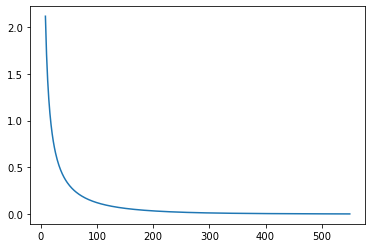

In [28]:
alpha1 = -0.9    # Spectral index for low energies
alpha2 = -2.5    # Spectral index for high energies
A_BAND = 0.15         # Amplitude
#A_BAND = 14.08
E_0_BAND = 160        # in keV

E = np.arange(8, 551)    # in keV
E_BAND = E

fBAND = np.where(E_BAND <= (alpha1 - alpha2)*E_0_BAND,
                A_BAND * (E_BAND/E_0_BAND)**alpha1 * np.exp(-E_BAND/E_0_BAND),
                A_BAND * (alpha1 - alpha2)**(alpha1 - alpha2) * (E_BAND/E_0_BAND)**alpha2 * np.exp(alpha2 - alpha1))

plt.plot(E_BAND, fBAND)

### BKN Model
For longer GRBs which are emitted by bigger sources

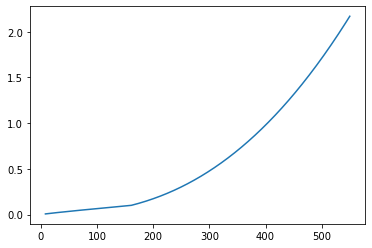

In [29]:
A_BKN = 0.099
E_0_BKN = E_0_BAND

E_BKN = E

fBKN = np.where(E_BKN <= E_0_BKN,
               A_BKN * (E_BKN/E_0_BKN)**(-alpha1),
               A_BKN * (E_BKN/E_0_BKN)**(-alpha2))

plt.plot(E_BKN, fBKN)

### Power Law Model
For a sanity check

# Warning

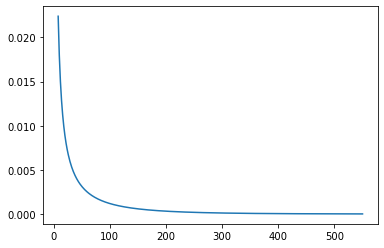

In [30]:
A_P = 0.16
E_0_P = 150
alpha = -0.92

E_P = E

fP = A_P * E_P**alpha * np.exp(-E_P/E_0_P)

plt.plot(E_P, fP)

# There seems to be an error here
# fP calculation is off by a factor of 100

Text(0.5, 0, 'Energy of radiation in keV')

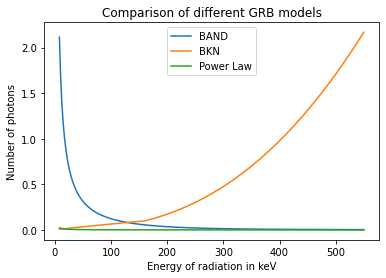

In [31]:
# Comparison of different GRB models
plt.plot(E, fBAND, label = 'BAND')
plt.plot(E, fBKN, label = 'BKN')
plt.plot(E, fP, label = 'Power Law')
plt.legend()
plt.title('Comparison of different GRB models')
plt.ylabel('Number of photons')    # (Total # photons in energy range normalised to 5000)
plt.xlabel('Energy of radiation in keV')

In [32]:
np.arange(-100,101)/20

array([-5.  , -4.95, -4.9 , -4.85, -4.8 , -4.75, -4.7 , -4.65, -4.6 ,
       -4.55, -4.5 , -4.45, -4.4 , -4.35, -4.3 , -4.25, -4.2 , -4.15,
       -4.1 , -4.05, -4.  , -3.95, -3.9 , -3.85, -3.8 , -3.75, -3.7 ,
       -3.65, -3.6 , -3.55, -3.5 , -3.45, -3.4 , -3.35, -3.3 , -3.25,
       -3.2 , -3.15, -3.1 , -3.05, -3.  , -2.95, -2.9 , -2.85, -2.8 ,
       -2.75, -2.7 , -2.65, -2.6 , -2.55, -2.5 , -2.45, -2.4 , -2.35,
       -2.3 , -2.25, -2.2 , -2.15, -2.1 , -2.05, -2.  , -1.95, -1.9 ,
       -1.85, -1.8 , -1.75, -1.7 , -1.65, -1.6 , -1.55, -1.5 , -1.45,
       -1.4 , -1.35, -1.3 , -1.25, -1.2 , -1.15, -1.1 , -1.05, -1.  ,
       -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 , -0.55,
       -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 ,
       -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
        0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,
        0.85,  0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,
        1.3 ,  1.35,

In [33]:
fft2(np.array([[1,2,3],[4,5,6],[7,8,9]]))

array([[ 45. -0.j        ,  -4.5+2.59807621j,  -4.5-2.59807621j],
       [-13.5+7.79422863j,   0. +0.j        ,   0. -0.j        ],
       [-13.5-7.79422863j,   0. +0.j        ,   0. -0.j        ]])

In [34]:
f = lambda y, x: x*y**2
#np.cdouble(dblquad(1j*np.cdouble(f), 0, 2, lambda x: 0, lambda x: 1))
f(np.array([2]),np.array([1]))

array([4])

In [35]:
def complex_quadrature(func, a, b, c, d, **kwargs):
    def real_func(x):
        return scipy.real(func(x))
    def imag_func(x):
        return scipy.imag(func(x))
    real_integral = dblquad(real_func, a, b, c, d, **kwargs)
    imag_integral = dblquad(imag_func, a, b, c, d, **kwargs)
    return (real_integral[0] + 1j*imag_integral[0])

def point_source_mag_wave(ux, uy, omega, D, M, z_L, theta_E):
    beta_x = ux * theta_E
    beta_y = uy * theta_E
    
    Big_Omega = 4*G*M*(1 + z_L)*omega/(c**3)
    
    time_delay_wave = lambda theta_y, theta_x: (D/c * (1 + z_L) * ((beta_x - theta_x)**2 + (beta_y - theta_y)**2)/2 - theta_E**2 * np.log(np.sqrt(theta_x**2 + theta_y**2)) )
    #print(time_delay_wave(theta_E/10,theta_E/10)*omega)
    # Approximating cos and sin to first order
    tmp_func = lambda theta_y, theta_x: 1
    F_mag = Big_Omega/(2*PI*1j) * (dblquad(tmp_func, -5*theta_E, 5*theta_E, lambda theta_x: -5*theta_E, lambda theta_x: 5*theta_E)[0] + 
                                   1j * omega * dblquad(time_delay_wave, 1*theta_E, 5*theta_E, lambda theta_x: 1*theta_E, lambda theta_x: 5*theta_E)[0])
    print(F_mag[0])
    # Alternatively, we can use a Fourier Transform
    #theta_x = np.outer(np.ones(201), theta_E * np.arange(-100,101)/20)
    #theta_y = np.outer(theta_E * np.arange(-100,101)/20, np.ones(201))
    
    #F_mag = Big_Omega/(2*PI*1j) * fft2((D/c * (1 + z_L) * ((beta_x - theta_x)**2 + (beta_y - theta_y)**2)/2 - theta_E**2 * np.log(np.sqrt(theta_x**2 + theta_y**2)) ))
    
    return (np.abs(F_mag))**2

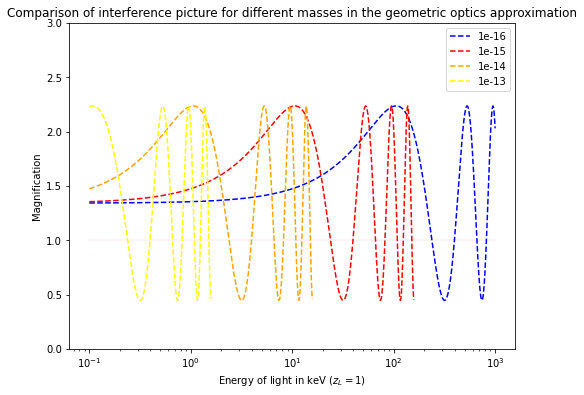

In [58]:
tmp_ux = 1
tmp_uy = 0

tmp_M = 1e-16
tmp_D = 1

tmp_theta_E = Einstein_angle(tmp_M, tmp_D)

tmp_z_L = 1

tmp_E = np.logspace(2, 6, 1000)

fig = plt.figure(figsize=(8,6))
plt.plot(tmp_E/1e3, np.ones(1000), c='lavenderblush')

plt.xscale('log')
tmp_Delta_td = time_delay(tmp_ux, tmp_theta_E, tmp_D, tmp_z_L)
tmp_phi = phase_shift(tmp_E / h_cross, tmp_Delta_td)
tmp_mag = point_source_mag(tmp_ux, tmp_phi)
plt.plot(tmp_E/1e3, tmp_mag, '--', c='blue', label='1e-16')

#tmp_ux = 2
#tmp_Delta_td = time_delay(tmp_ux, tmp_theta_E, tmp_D, tmp_z_L)
#tmp_phi = phase_shift(tmp_E / h_cross, tmp_Delta_td)
#tmp_mag = point_source_mag(tmp_ux, tmp_phi)
#plt.plot(tmp_E/1e3, tmp_mag, '--', c='springgreen')

tmp_M = 1e-15
tmp_theta_E = Einstein_angle(tmp_M, tmp_D)
tmp_Delta_td = time_delay(tmp_ux, tmp_theta_E, tmp_D, tmp_z_L)
tmp_phi = phase_shift(tmp_E / h_cross, tmp_Delta_td)
tmp_mag = point_source_mag(tmp_ux, tmp_phi)
plt.plot(tmp_E[:800]/1e3, tmp_mag[:800], '--', c='red', label='1e-15')

tmp_M = 1e-14
tmp_theta_E = Einstein_angle(tmp_M, tmp_D)
tmp_Delta_td = time_delay(tmp_ux, tmp_theta_E, tmp_D, tmp_z_L)
tmp_phi = phase_shift(tmp_E / h_cross, tmp_Delta_td)
tmp_mag = point_source_mag(tmp_ux, tmp_phi)
plt.plot(tmp_E[:550]/1e3, tmp_mag[:550], '--', c='orange',label='1e-14')

tmp_M = 1e-13
tmp_theta_E = Einstein_angle(tmp_M, tmp_D)
tmp_Delta_td = time_delay(tmp_ux, tmp_theta_E, tmp_D, tmp_z_L)
tmp_phi = phase_shift(tmp_E / h_cross, tmp_Delta_td)
tmp_mag = point_source_mag(tmp_ux, tmp_phi)
plt.plot(tmp_E[:300]/1e3, tmp_mag[:300], '--', c='yellow', label='1e-13')

plt.ylabel('Magnification')
plt.xlabel('Energy of light in keV ($z_L = 1$)')
plt.title('Comparison of interference picture for different masses in the geometric optics approximation')
plt.gca().set_ylim([0,3])
plt.legend()
plt.show()

#tmp_ux = 1

#tmp_mag_wave = point_source_mag_wave(tmp_ux, tmp_uy, tmp_E/h_cross, tmp_D, tmp_M, z_L, tmp_theta_E)
#plt.plot(tmp_E, tmp_mag_wave, '-', c='red')

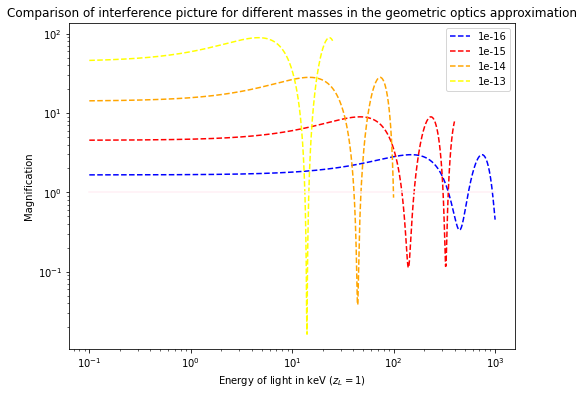

In [65]:
tmp_theta = 1e-19

tmp_M = 1e-16
tmp_D = 1

tmp_theta_E = Einstein_angle(tmp_M, tmp_D)

tmp_ux = tmp_theta/tmp_theta_E
tmp_uy = 0

tmp_z_L = 1

tmp_E = np.logspace(2, 6, 1000)

fig = plt.figure(figsize=(8,6))

plt.xscale('log')
tmp_Delta_td = time_delay(tmp_ux, tmp_theta_E, tmp_D, tmp_z_L)
tmp_phi = phase_shift(tmp_E / h_cross, tmp_Delta_td)
tmp_mag = point_source_mag(tmp_ux, tmp_phi)
plt.plot(tmp_E/1e3, tmp_mag, '--', c='blue', label='1e-16')

tmp_M = 1e-15
tmp_theta_E = Einstein_angle(tmp_M, tmp_D)
tmp_ux = tmp_theta/tmp_theta_E
tmp_Delta_td = time_delay(tmp_ux, tmp_theta_E, tmp_D, tmp_z_L)
tmp_phi = phase_shift(tmp_E / h_cross, tmp_Delta_td)
tmp_mag = point_source_mag(tmp_ux, tmp_phi)
plt.plot(tmp_E[:900]/1e3, tmp_mag[:900], '--', c='red', label='1e-15')

tmp_M = 1e-14
tmp_theta_E = Einstein_angle(tmp_M, tmp_D)
tmp_ux = tmp_theta/tmp_theta_E
tmp_Delta_td = time_delay(tmp_ux, tmp_theta_E, tmp_D, tmp_z_L)
tmp_phi = phase_shift(tmp_E / h_cross, tmp_Delta_td)
tmp_mag = point_source_mag(tmp_ux, tmp_phi)
plt.plot(tmp_E[:750]/1e3, tmp_mag[:750], '--', c='orange',label='1e-14')

tmp_M = 1e-13
tmp_theta_E = Einstein_angle(tmp_M, tmp_D)
tmp_ux = tmp_theta/tmp_theta_E
tmp_Delta_td = time_delay(tmp_ux, tmp_theta_E, tmp_D, tmp_z_L)
tmp_phi = phase_shift(tmp_E / h_cross, tmp_Delta_td)
tmp_mag = point_source_mag(tmp_ux, tmp_phi)
plt.plot(tmp_E[:600]/1e3, tmp_mag[:600], '--', c='yellow', label='1e-13')

plt.ylabel('Magnification')
plt.xlabel('Energy of light in keV ($z_L = 1$)')
plt.title('Comparison of interference picture for different masses in the geometric optics approximation')
#plt.gca().set_ylim([0,3])
plt.yscale('log')
plt.legend()
plt.plot(tmp_E/1e3, np.ones(1000),c='lavenderblush')
plt.show()

#tmp_ux = 1

#tmp_mag_wave = point_source_mag_wave(tmp_ux, tmp_uy, tmp_E/h_cross, tmp_D, tmp_M, z_L, tmp_theta_E)
#plt.plot(tmp_E, tmp_mag_wave, '-', c='red')

[0.05736349 0.05553315 0.05414151 0.05309019 0.05230011 0.05170878
 0.05126764 0.05093935 0.0506955  0.05051464 0.05038063 0.05028142
 0.05020801 0.05015373 0.05011359 0.05008393 0.050062   0.0500458
 0.05003384 0.05002499]
[   3162.27766017    4281.33239872    5796.39395338    7847.59970351
   10624.67830894   14384.49888288   19474.83039909   26366.5089873
   35696.98846826   48329.30238572   65431.89129713   88586.67904101
  119935.39462092  162377.67391887  219839.26488623  297635.14416313
  402961.13202004  545559.47811685  738619.98220794 1000000.        ]


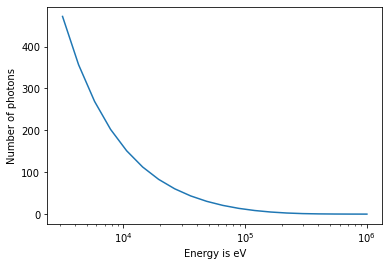

In [37]:
alpha1 = -0.9    # Spectral index for low energies
alpha2 = -2.5    # Spectral index for high energies
A_BAND = 14.08         # Amplitude

E_0_BAND = 160 * 1e3        # in eV

E = np.logspace(0.5, 3, 20)*1e3    # in eV
E_BAND = E

delta_E = E * np.sqrt((0.05/(np.sqrt(E/1e3)))**2 + 0.05**2)
print(delta_E/E)
print(E)

fBAND = np.where(E_BAND <= (alpha1 - alpha2)*E_0_BAND,
                A_BAND * (E_BAND/E_0_BAND)**alpha1 * np.exp(-E_BAND/E_0_BAND),
                A_BAND * (alpha1 - alpha2)**(alpha1 - alpha2) * (E_BAND/E_0_BAND)**alpha2 * np.exp(alpha2 - alpha1))

plt.xscale('log')
plt.xlabel('Energy is eV')
plt.ylabel('Number of photons')
plt.plot(E_BAND, fBAND)